In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import requests
import time
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
sys.path.append(os.path.abspath("C:/Users/calvotello/Dropbox/MTB/Göttingen/research/"))


In [3]:
from librarian_robot import downloading_datasets, map_classications_systems, tokenize



# Read Data

In [4]:
df = pd.read_parquet("./../data/exemplars.parquet")

In [5]:
df

ppn medium                               title  \
10    10    Aau  Une @saison dans la vie d'Emmanuel   
10    10    Aau  Une @saison dans la vie d'Emmanuel   
10    10    Aau  Une @saison dans la vie d'Emmanuel   
93    93    Aau                               Camus   
218  218    Abv                    1 2 3..! Lecture   
..   ...    ...                                 ...   
509  509    Acu                    Œuvres complètes   
509  509    Acu                    Œuvres complètes   
509  509    Acu                    Œuvres complètes   
960  960    Oau                        Ritterhelden   
960  960    Oau                        Ritterhelden   

                                      title_supplement  year      entry_first  \
10                                               roman  1991    0003:26-01-00   
10                                               roman  1991    0003:26-01-00   
10                                               roman  1991    0003:26-01-00   
93                                                None  1987  HDBSRO:13-09-18   
218                                               None  1982    2004:02-10-20   
..                                                 ...   ...              ...   
509                                               None  2001    FRUB:04-10-01   
509                                               None  2001    FRUB:04-10-01   
509                                               None  2001    FRUB:04-10-01   
960  Rittertum, Autonomie und Fürstendienst in nied...  2019    HDUB:04-05-21   
960  Rittertum, Autonomie und Fürstendienst in nied...  2019    HDUB:04-05-21   

    author_first_name author_last_name author_gnd_id editor_first_name  ...  \
10       Marie-Claire            Blais     283179058              None  ...   
10       Marie-Claire            Blais     283179058              None  ...   
10       Marie-Claire            Blais     283179058              None  ...   
93             Morvan         Lebesque     077112679              None  ...   
218              None             None          None              None  ...   
..                ...              ...           ...               ...  ...   
509           Gustave         Flaubert     283822619              None  ...   
509           Gustave         Flaubert     283822619              None  ...   
509           Gustave         Flaubert     283822619              None  ...   
960              Gero         Schreier     859353559              None  ...   
960              Gero         Schreier     859353559              None  ...   

                                         signatur_date Abrufzeichen  \
10                          28-02-18|26-01-00|23-02-15         None   
10                          28-02-18|26-01-00|23-02-15         None   
10                          28-02-18|26-01-00|23-02-15         None   
93                                   01-07-05|01-07-05         None   
218                                               None         None   
..                                                 ...          ...   
509  29-07-21|21-02-02|22-05-14|04-10-01|26-11-01|1...         None   
509  29-07-21|21-02-02|22-05-14|04-10-01|26-11-01|1...         None   
509  29-07-21|21-02-02|22-05-14|04-10-01|26-11-01|1...         None   
960                                           04-05-21         None   
960                                           04-05-21         None   

             query                                       keyword_RSWK  \
10   pica_jah_1965                                               None   
10   pica_jah_1965                                               None   
10   pica_jah_1965                                               None   
93   pica_jah_1965                                               None   
218  pica_jah_1965                                               None   
..             ...                                                ...   
509  pica_jah_2021                                        

In [6]:
", ".join(df.columns.tolist())


'ppn, medium, title, title_supplement, year, entry_first, author_first_name, author_last_name, author_gnd_id, editor_first_name, editor_last_name, editor_gnd_id, isbn, ILNs, content_type_ppn, content_type, publisher, language_text, language_original, pages, comment_isbn, issn, comment_issn, place_publication, summary, title_continuing_resource, work_ppn, work_info, work_title, expression_ppn, expression_info, expression_title, DDC_notation, DDC_sachgruppe, DDC_grundnotation, BK_ppn, BK_notation, BK_j, RVK_ppn, RVK_notation, RVK_j, RVK_k, keyword_ppn, keyword, keyword_loc_ppn, keyword_loc, lcc_notation, klassifikationssystem_system, klassifikationssystem_notation, uri_description, uri, GOK_ppn, GOK_notation, GOK_j, signatur_place, signatur, signatur_date, Abrufzeichen, query, keyword_RSWK, keyword_K10plus, keyword_project, keyword_local, keyword_045D, year_publication, ILNs_libraries'

In [7]:
df.shape

(2241246, 66)

# Medium

In [8]:
keywords_columns_lt = [column for column in df.columns.tolist() if "keyword" in column if "ppn" not in column]

In [9]:
keywords_columns_lt

['keyword',
 'keyword_loc',
 'keyword_RSWK',
 'keyword_K10plus',
 'keyword_project',
 'keyword_local',
 'keyword_045D']

In [10]:
for keywords_column in keywords_columns_lt:
    print("\n\n", keywords_column, df[keywords_column].dropna().head(1))




 keyword 957    Mundart
Name: keyword, dtype: object


 keyword_loc 37    Buchhandel|Buchproduktion
Name: keyword_loc, dtype: object


 keyword_RSWK 957    Bourbonnais|Mundart
Name: keyword_RSWK, dtype: object


 keyword_K10plus 37    Frankreich|Buchhandel|Buchproduktion|DA-3
Name: keyword_K10plus, dtype: object


 keyword_project Series([], Name: keyword_project, dtype: float64)


 keyword_local 468     Protestbewegung| Internationalismus| Chile| G...
Name: keyword_local, dtype: object


 keyword_045D 353    Vereinigte Staaten|Bilaterale internationale B...
Name: keyword_045D, dtype: object


In [11]:
df[keywords_columns_lt].dropna(how="all")

keyword                keyword_loc  \
37     None  Buchhandel|Buchproduktion   
37     None  Buchhandel|Buchproduktion   
37     None  Buchhandel|Buchproduktion   
37     None  Buchhandel|Buchproduktion   
37     None  Buchhandel|Buchproduktion   
..      ...                        ...   
605    None                       None   
605    None                       None   
605    None                       None   
960    None                       None   
960    None                       None   

                                          keyword_RSWK  \
37                                                None   
37                                                None   
37                                                None   
37                                                None   
37                                                None   
..                                                 ...   
605                                               None   
605                                               None   
605                                               None   
960  Frankreich|Deutschland|Niederadel|Biografik|He...   
960  Frankreich|Deutschland|Niederadel|Biografik|He...   

                                       keyword_K10plus  keyword_project  \
37                                                None              NaN   
37                                                None              NaN   
37                                                None              NaN   
37                                                None              NaN   
37                                                None              NaN   
..                                                 ...              ...   
605                                            Salgari              NaN   
605                                            Salgari              NaN   
605                                            Salgari              NaN   
960  Frankreich|Deutschland|Niederadel|Biografik|He...              NaN   
960  Frankreich|Deutschland|Niederadel|Biografik|He...              NaN   

    keyword_local keyword_045D  
37           None         None  
37           None         None  
37           None         None  
37           None         None  
37           None         None  
..            ...          ...  
605          None         None  
605          None         None  
605          None         None  
960          None         None  
960          None         None  

[1255231 rows x 7 columns]

In [12]:
df[keywords_columns_lt].dropna(how="all").notna().sum().sort_values().plot.barh()

In [13]:
df[keywords_columns_lt].dropna(how="all").shape[0] / df.shape[0] * 100

56.00594490743096

In [14]:
for column in keywords_columns_lt:
    df[column] = df[column].fillna("").astype(str)

In [15]:

df['keywords'] = df[keywords_columns_lt].agg('|'.join, axis=1)


In [16]:
df["keywords"] = df["keywords"].str.replace("\|+","|")
df["keywords"] = df["keywords"].str.replace("(?:^\||\|$)+","")


In [17]:
df["keywords"]

10                                                      
10                                                      
10                                                      
93                                                      
218                                                     
                             ...                        
509                                                     
509                                                     
509                                                     
960    Frankreich|Deutschland|Niederadel|Biografik|He...
960    Frankreich|Deutschland|Niederadel|Biografik|He...
Name: keywords, Length: 2241246, dtype: object

In [18]:
df = df.loc[df["keywords"] != ""]

In [19]:
df.shape

(1255231, 67)

In [20]:
df["keywords"].value_counts()

Französisch|Literatur                    7450
Spanisch                                 6647
Französisch                              5951
Italienisch|Literatur                    4852
Literatur                                4503
                                         ... 
Kultur|Spanischunterricht                   1
Vinet                                       1
Pentimerone                                 1
Treves|Italien|Geschichtswissenschaft       1
Spanisch|Liebeserklärung|DE-101             1
Name: keywords, Length: 148707, dtype: int64

In [21]:
keywords_df = tokenize.tokenize_column(df, "keywords",  ngram_range=(1,1), analyzer="word",  reg_ex='(?u)\\b[^\|]+\\b', max_features = 1000, add_name_of_original_column = False)

Shape of tokens:  (1255231, 1000)
Shape of tokens after filtering:  (1255231, 1000)


In [22]:
keywords_df

französisch  literatur  spanisch  italienisch  deutsch  frankreich  \
37             0          0         0            0        0           0   
37             0          0         0            0        0           0   
37             0          0         0            0        0           0   
37             0          0         0            0        0           0   
37             0          0         0            0        0           0   
..           ...        ...       ...          ...      ...         ...   
605            0          0         0            0        0           0   
605            0          0         0            0        0           0   
605            0          0         0            0        0           0   
960            0          0         0            0        0           2   
960            0          0         0            0        0           2   

     de-101  romanische sprachen  rezeption  roman  ...  logische partikel  \
37        0                    0          0      0  ...                  0   
37        0                    0          0      0  ...                  0   
37        0                    0          0      0  ...                  0   
37        0                    0          0      0  ...                  0   
37        0                    0          0      0  ...                  0   
..      ...                  ...        ...    ...  ...                ...   
605       0                    0          0      0  ...                  0   
605       0                    0          0      0  ...                  0   
605       0                    0          0      0  ...                  0   
960       1                    0          0      0  ...                  0   
960       1                    0          0      0  ...                  0   

     wahnsinn  körpererfahrung  volkserzählung  region  andalusien  sciascia  \
37          0                0               0       0           0         0   
37          0                0               0       0           0         0   
37          0                0               0       0           0         0   
37          0                0               0       0           0         0   
37          0                0               0       0           0         0   
..        ...              ...             ...     ...         ...       ...   
605         0                0               0       0           0         0   
605         0                0               0       0           0         0   
605         0                0               0       0           0         0   
960         0                0               0       0           0         0   
960         0                0               0       0           0         0   

     nietzsche  entlehnung  generative phonologie  
37           0           0                      0  
37           0           0                      0  
37           0           0                      0  
37           0           0                      0  
37           0           0                      0  
..         ...         ...                    ...  
605          0           0                      0  
605          0           0                      0  
605          0           0                      0  
960          0           0                      0  
960          0           0                      0  

[1255231 rows x 1000 columns]

In [27]:
for column in keywords_lt():
    if len(column) < 5:
        print(column)


NameError: name 'keywords_lt' is not defined

In [24]:
keywords_df.iloc[:,0:20].sum()

französisch            286914
literatur              248814
spanisch               162107
italienisch            111976
deutsch                 68011
frankreich              57027
de-101                  54123
romanische sprachen     51226
rezeption               50847
roman                   44559
bvb                     44210
lyrik                   40269
grammatik               29503
drama                   28746
übersetzung             27976
portugiesisch           27847
kongress                23956
kultur                  23724
linguistik              20919
deutschland             20874
dtype: int64

In [25]:
keywords_df.iloc[:,0:20].sum().plot.barh()

In [28]:
keywords_lt = keywords_df.columns.tolist()

In [32]:
for column in keywords_lt:
    if len(column) < 1:
        print(column)


In [34]:
df = pd.concat([df, keywords_df], axis=1)

In [35]:
years_keywords_df = df.groupby(["year_publication"])[keywords_lt].sum()
years_keywords_df

französisch  literatur  spanisch  italienisch  deutsch  \
year_publication                                                           
1980                     4104       2864      1524         1098      463   
1981                     4122       2654      1046          778      706   
1982                     5665       4850      1452         1232     1370   
1983                     6236       5250      1710         1648      826   
1984                     7191       6503      1686         1765     1305   
1985                     5491       4130      2166         1166      798   
1986                     6920       4681      2892         1640     1164   
1987                     5713       3948      2218         1744     1115   
1988                     6716       4967      2332         2222     1022   
1989                     6704       5339      2398         2402     1115   
1990                     6322       5384      3498         3224     1326   
1991                     7515       6023      3742         3120      900   
1992                     6730       5531      3186         2736     1074   
1993                     7049       5266      3551         2842     2033   
1994                     8097       6665      4069         3334     2144   
1995                     8234       6150      4382         3472     1647   
1996                     8379       7488      4142         4196     1676   
1997                     8547       6637      4386         3506     2214   
1998                    10398       6799      4344         3152     2097   
1999                     8531       7763      4074         3882     2257   
2000                     8691       7707      5143         4204     3067   
2001                     9218       6781      5300         3714     3004   
2002                     8320       7561      5110         3416     2460   
2003                     7906       8649      4734         4300     1670   
2004                     7615       8121      5942         3556     2108   
2005                     8672       8507      6120         4396     2000   
2006                     9017       7993      5828         3438     2825   
2007                     8770       7228      5475         3500     2142   
2008                     8574       7247      5585         3268     2290   
2009                     7589       6117      5512         2844     1831   
2010                     8172       7227      5316         2959     2058   
2011                     9643       6858      7035         3642     2235   
2012                     9163       7605      7011         4174     2072   
2013                     6372       6477      5110         2378     2210   
2014                     5643       5489      4995         1958     1708   
2015                     5793       6112      4306         2364     1767   
2016                     6156       6573      4212         2296     2055   
2017                     4771       5544      3425         2062      905   
2018                     4101       6089      3530         2400     1035   
2019                     4064       6037      3620         1948     1317   

                  frankreich  de-101  romanische sprachen  rezeption  roman  \
year_publication                                                              
1980                     936       0                  638        324    840   
1981                     652       0                  644        438    516   
1982                     750       5                  708        314    876   
1983                     818       4                  552        410    662   
1984                    1250       1                 1078        258    984   
1985                    1536       0                  762        544    818   
1986                    1139       0                  598        526   1562   
1987                    1193       0                  720        398    936   
1988                    1148       

In [36]:
years_keywords_rel_df = (years_keywords_df.loc[:].div(years_keywords_df.sum(axis='columns'), axis="index")*100).round(2)

In [37]:
years_keywords_rel_df

französisch  literatur  spanisch  italienisch  deutsch  \
year_publication                                                           
1980                    10.88       7.59      4.04         2.91     1.23   
1981                    12.97       8.35      3.29         2.45     2.22   
1982                    13.28      11.37      3.40         2.89     3.21   
1983                    12.71      10.70      3.48         3.36     1.68   
1984                    12.36      11.18      2.90         3.03     2.24   
1985                    11.09       8.34      4.38         2.36     1.61   
1986                    11.15       7.54      4.66         2.64     1.87   
1987                    11.10       7.67      4.31         3.39     2.17   
1988                    11.06       8.18      3.84         3.66     1.68   
1989                    11.23       8.95      4.02         4.02     1.87   
1990                     9.56       8.14      5.29         4.88     2.01   
1991                    10.76       8.63      5.36         4.47     1.29   
1992                     9.74       8.00      4.61         3.96     1.55   
1993                     9.11       6.80      4.59         3.67     2.63   
1994                     9.25       7.62      4.65         3.81     2.45   
1995                     9.32       6.96      4.96         3.93     1.86   
1996                     9.06       8.10      4.48         4.54     1.81   
1997                     9.28       7.21      4.76         3.81     2.40   
1998                    10.74       7.02      4.49         3.26     2.17   
1999                     8.13       7.40      3.88         3.70     2.15   
2000                     7.60       6.74      4.50         3.68     2.68   
2001                     8.51       6.26      4.89         3.43     2.77   
2002                     7.63       6.93      4.69         3.13     2.26   
2003                     7.32       8.01      4.39         3.98     1.55   
2004                     6.92       7.38      5.40         3.23     1.92   
2005                     7.63       7.49      5.39         3.87     1.76   
2006                     7.88       6.98      5.09         3.00     2.47   
2007                     7.53       6.21      4.70         3.01     1.84   
2008                     7.15       6.04      4.66         2.73     1.91   
2009                     6.94       5.59      5.04         2.60     1.67   
2010                     7.07       6.25      4.60         2.56     1.78   
2011                     6.63       4.72      4.84         2.50     1.54   
2012                     6.84       5.67      5.23         3.11     1.55   
2013                     6.72       6.83      5.39         2.51     2.33   
2014                     6.73       6.55      5.96         2.34     2.04   
2015                     6.50       6.85      4.83         2.65     1.98   
2016                     6.24       6.67      4.27         2.33     2.08   
2017                     5.63       6.54      4.04         2.43     1.07   
2018                     4.85       7.20      4.17         2.84     1.22   
2019                     5.11       7.59      4.55         2.45     1.66   

                  frankreich  de-101  romanische sprachen  rezeption  roman  \
year_publication                                                              
1980                    2.48    0.00                 1.69       0.86   2.23   
1981                    2.05    0.00                 2.03       1.38   1.62   
1982                    1.76    0.01                 1.66       0.74   2.05   
1983                    1.67    0.01                 1.12       0.84   1.35   
1984                    2.15    0.00                 1.85       0.44   1.69   
1985                    3.10    0.00                 1.54       1.10   1.65   
1986                    1.83    0.00                 0.96       0.85   2.52   
1987                    2.32    0.00                 1.40       0.77   1.82   
1988                    1.89    0.0

In [38]:
years_keywords_rel_df.iloc[:,0:10].plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [39]:
years_keywords_rel_df.iloc[:,0:20].plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

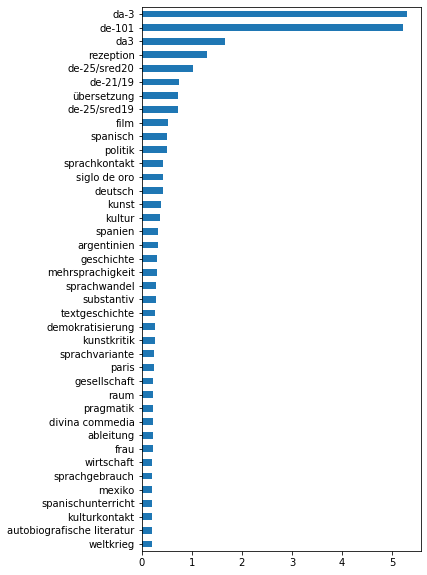

In [40]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).head(40).sort_values(ascending=True).plot.barh(figsize=(5,10))

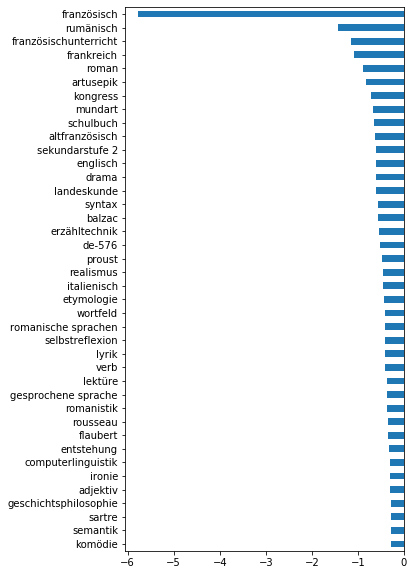

In [41]:
years_keywords_rel_df.diff().sum().sort_values(ascending=False).tail(40).plot.barh(figsize=(5,10))

In [42]:
keywords_df.iloc[:,0:5].corr()

französisch  literatur  spanisch  italienisch   deutsch
französisch     1.000000   0.281251 -0.085898    -0.054226  0.151820
literatur       0.281251   1.000000  0.060710     0.130655  0.080526
spanisch       -0.085898   0.060710  1.000000    -0.041512  0.065726
italienisch    -0.054226   0.130655 -0.041512     1.000000  0.065174
deutsch         0.151820   0.080526  0.065726     0.065174  1.000000

In [43]:
keywords_df.iloc[:,0:20].corr()

französisch  literatur  spanisch  italienisch   deutsch  \
französisch             1.000000   0.281251 -0.085898    -0.054226  0.151820   
literatur               0.281251   1.000000  0.060710     0.130655  0.080526   
spanisch               -0.085898   0.060710  1.000000    -0.041512  0.065726   
italienisch            -0.054226   0.130655 -0.041512     1.000000  0.065174   
deutsch                 0.151820   0.080526  0.065726     0.065174  1.000000   
frankreich              0.057786   0.040061 -0.045661    -0.033902  0.000331   
de-101                 -0.011179   0.016797  0.020518    -0.008528  0.037769   
romanische sprachen    -0.045541   0.087211 -0.037340    -0.014715  0.004086   
rezeption              -0.005784   0.096149 -0.002868     0.011767  0.037846   
roman                   0.086884  -0.026803  0.023329    -0.009242 -0.010810   
bvb                     0.004510   0.002620  0.004159     0.001499  0.014535   
lyrik                   0.030278  -0.032574  0.019884     0.059224 -0.011777   
grammatik               0.123158  -0.039006  0.080207     0.044063 -0.015756   
drama                   0.020644  -0.033206  0.064716    -0.002645 -0.012106   
übersetzung             0.039472   0.083021  0.030895     0.024944  0.303514   
portugiesisch          -0.042363   0.028531  0.019896    -0.024487  0.078961   
kongress                0.003965   0.029202 -0.005000     0.007199 -0.012727   
kultur                  0.004772   0.080918 -0.010769    -0.001537 -0.006432   
linguistik              0.016016  -0.017901  0.024497     0.019548 -0.005373   
deutschland             0.004523   0.031648 -0.013720    -0.010127  0.053007   

                     frankreich    de-101  romanische sprachen  rezeption  \
französisch            0.057786 -0.011179            -0.045541  -0.005784   
literatur              0.040061  0.016797             0.087211   0.096149   
spanisch              -0.045661  0.020518            -0.037340  -0.002868   
italienisch           -0.033902 -0.008528            -0.014715   0.011767   
deutsch                0.000331  0.037769             0.004086   0.037846   
frankreich             1.000000  0.044549            -0.020404   0.021070   
de-101                 0.044549  1.000000             0.012131   0.029565   
romanische sprachen   -0.020404  0.012131             1.000000  -0.009725   
rezeption              0.021070  0.029565            -0.009725   1.000000   
roman                 -0.008030  0.000931            -0.015244   0.005765   
bvb                    0.033014  0.025215             0.002752   0.007392   
lyrik                 -0.014637 -0.009209            -0.007691   0.006973   
grammatik             -0.016746  0.004256             0.001868  -0.017957   
drama                  0.008126  0.000164            -0.015760   0.039564   
übersetzung            0.002501  0.022326             0.007620   0.022689   
portugiesisch         -0.019128  0.006246            -0.012814  -0.013046   
kongress               0.008379 -0.022342             0.012753   0.006703   
kultur                 0.087665  0.028573            -0.011997   0.019039   
linguistik            -0.008069  0.002916             0.061494  -0.006990   
deutschland            0.271741  0.059296            -0.003655   0.127411   

                        roman       bvb     lyrik  grammatik     drama  \
französisch          0.086884  0.004510  0.030278   0.123158  0.020644   
literatur           -0.026803  0.002620 -0.032574  -0.039006 -0.033206   
spanisch             0.023329  0.004159  0.019884   0.080207  0.064716   
italienisch         -0.009242  0.001499  0.059224   0.044063 -0.002645   
deutsch             -0.010810  0.014535 -0.011777  -0.015756 -0.012106   
frankreich          -0.008030  0.033014 -0.014637  -0.016746  0.008126   
de-101               0.000931  0.025215 -0.009209   0.004256  0.000164   
romanische sprachen -0.015244  0.002752 -0.007691   0.001868 -0.015760   
rezeption            0.005765  0.007392  0.006973  -0.01

C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


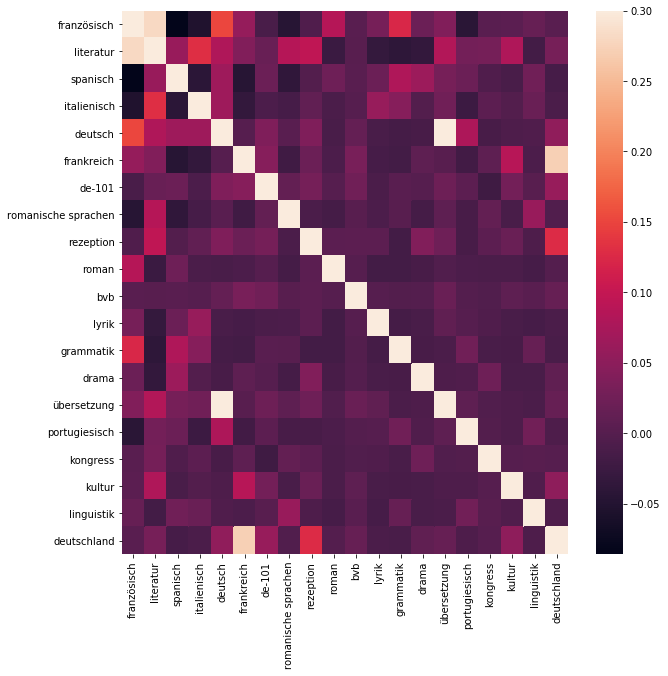

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
#fig.set_size(10, 10)
sns.heatmap(keywords_df.iloc[:,0:20].corr(), annot=False, ax=ax, vmax=0.3)
fig.show()


In [46]:
keywords_df.columns.tolist()[0:20]

['französisch',
 'literatur',
 'spanisch',
 'italienisch',
 'deutsch',
 'frankreich',
 'de-101',
 'romanische sprachen',
 'rezeption',
 'roman',
 'bvb',
 'lyrik',
 'grammatik',
 'drama',
 'übersetzung',
 'portugiesisch',
 'kongress',
 'kultur',
 'linguistik',
 'deutschland']

In [47]:
languages_lt = sorted([
 'französisch',
 'spanisch',
 'italienisch',
 'deutsch',
 'romanische sprachen',
 'portugiesisch',
])

disciplines_lt = [
 'literatur',
 'linguistik']




In [48]:
fig, ax = plt.subplots(figsize=(5,5))
#fig.set_size(10, 10)
sns.heatmap(keywords_df[disciplines_lt + languages_lt].corr().round(2), annot=True, ax=ax, vmax=0.3)
fig.show()

C:\Users\calvotello\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
